In [4]:
# Load and Absic Information
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('data/train.csv', low_memory=False)
store = pd.read_csv('data/store.csv')
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532483 entries, 0 to 532482
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          532483 non-null  int64  
 1   DayOfWeek      532482 non-null  float64
 2   Date           532482 non-null  object 
 3   Sales          532482 non-null  float64
 4   Customers      532482 non-null  float64
 5   Open           532482 non-null  float64
 6   Promo          532482 non-null  float64
 7   StateHoliday   532482 non-null  object 
 8   SchoolHoliday  532482 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 36.6+ MB
None


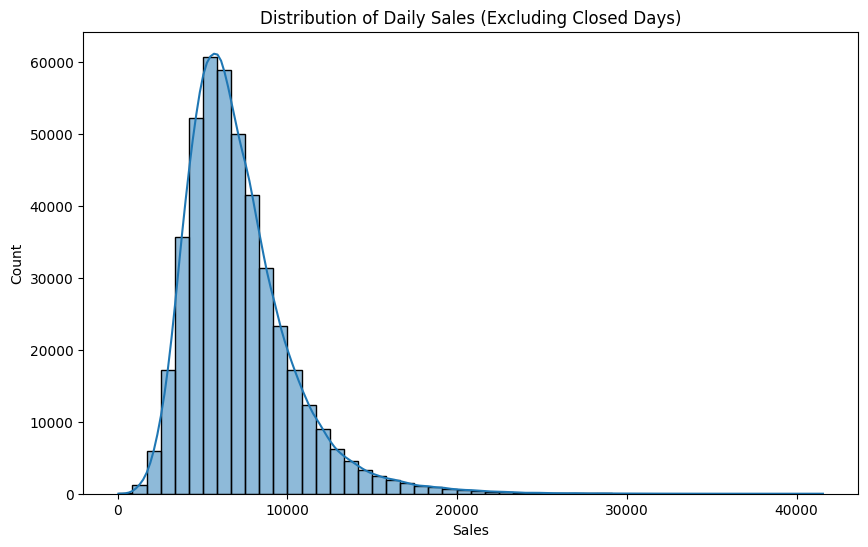

In [11]:
# Target Variable Distribution
plt.figure(figsize=(10,6))
sns.histplot(train[train.Sales > 0]['Sales'], bins=50, kde=True)
plt.title("Distribution of Daily Sales (Excluding Closed Days)")
plt.show()

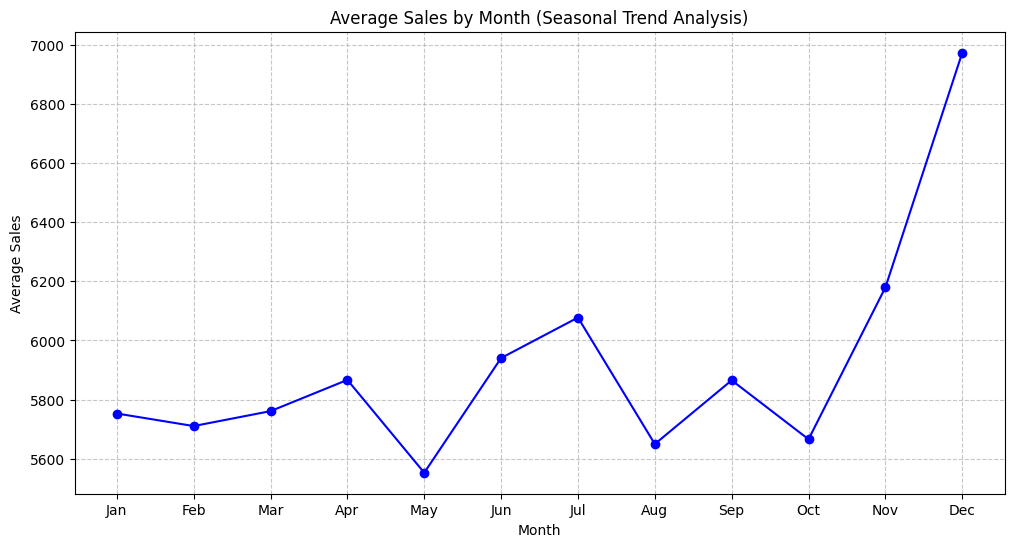

In [10]:
# Seasonality Check
plt.figure(figsize=(12, 6))

train['Date'] = pd.to_datetime(train['Date'])
seasonal_data = train.groupby(train['Date'].dt.month)['Sales'].mean()
seasonal_data.plot(kind='line', marker='o', color='b')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title("Average Sales by Month (Seasonal Trend Analysis)")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

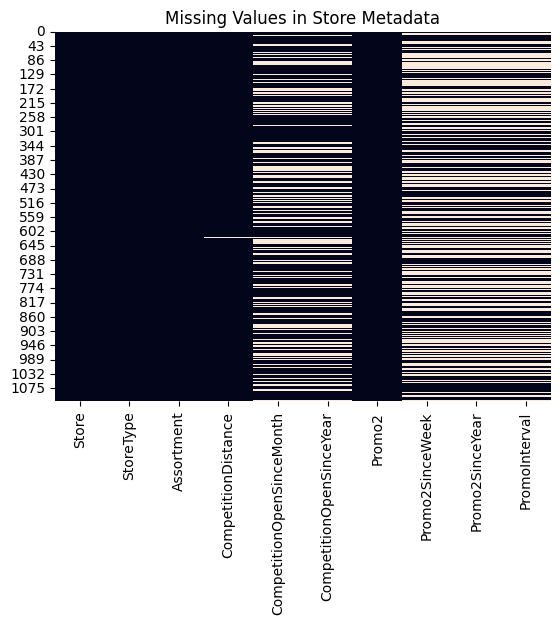

In [8]:
# Data Reality Check (The Nulls)
sns.heatmap(store.isnull(), cbar=False)
plt.title("Missing Values in Store Metadata")
plt.show()

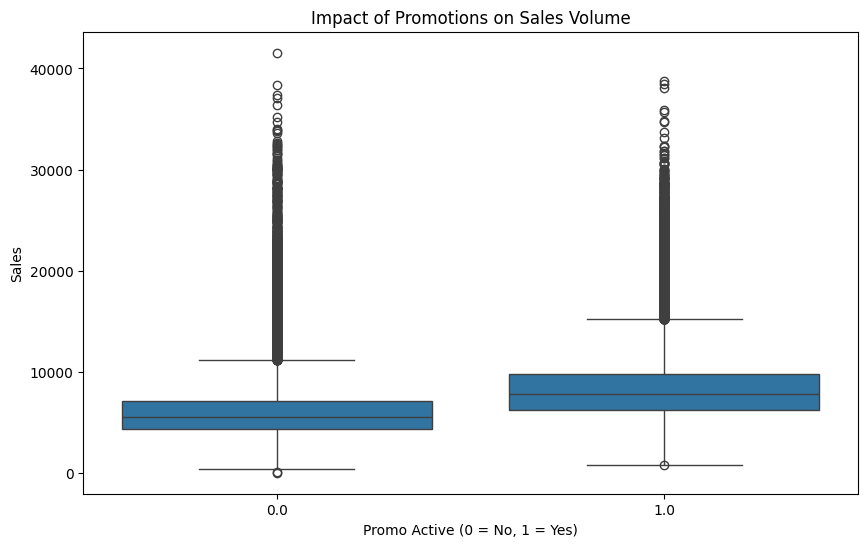

In [12]:
# Promo imprt analysis
plt.figure(figsize=(10, 6))

sns.boxplot(x='Promo', y='Sales', data=train[train['Sales'] > 0])
plt.title("Impact of Promotions on Sales Volume")
plt.xlabel("Promo Active (0 = No, 1 = Yes)")
plt.ylabel("Sales")
plt.show()

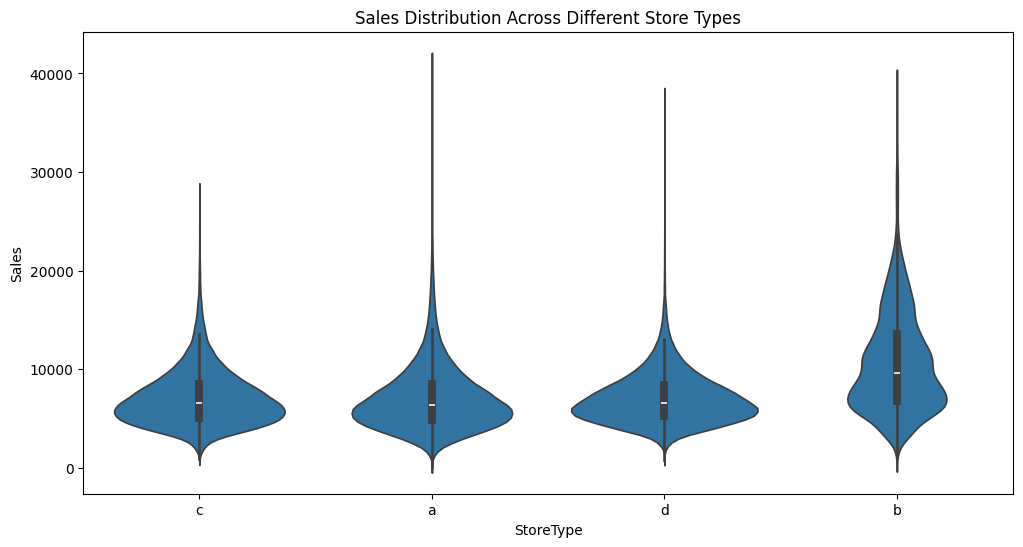

In [16]:
# Store type performance
df_merged = pd.merge(train, store, on='Store')

plt.figure(figsize=(12, 6))
sns.violinplot(x='StoreType', y='Sales', data=df_merged[df_merged['Sales'] > 0])
plt.title("Sales Distribution Across Different Store Types")
plt.show()

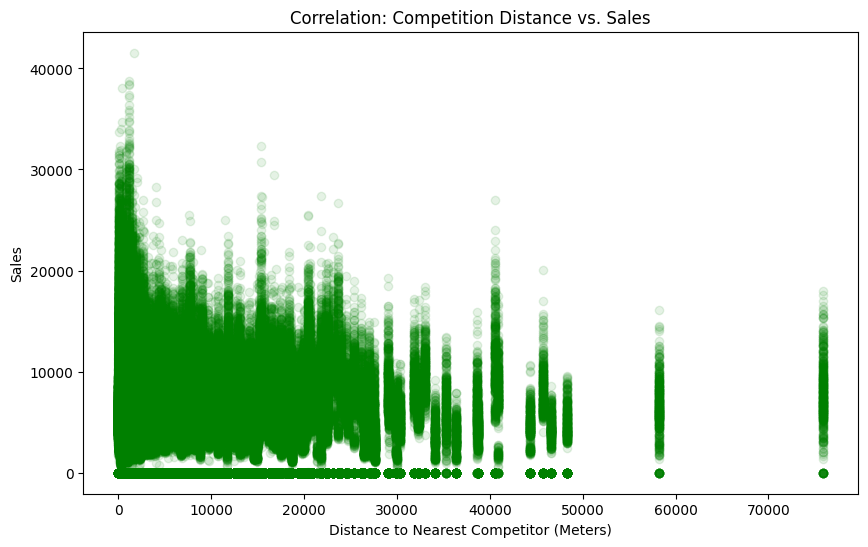

In [14]:
# Competition distance vs sales
plt.figure(figsize=(10, 6))

plt.scatter(df_merged['CompetitionDistance'], df_merged['Sales'], alpha=0.1, c='green')
plt.title("Correlation: Competition Distance vs. Sales")
plt.xlabel("Distance to Nearest Competitor (Meters)")
plt.ylabel("Sales")
plt.show()